In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf

# from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
stockCode = "IONQ"
# startDate = "2022-07-01"
# endDate = "2023-06-30"

In [3]:
ticker = yf.Ticker(stockCode)
# price_hist = ticker.history(start=startDate, end=endDate)
price_hist = ticker.history(period="max", interval="1d")

In [4]:
price_hist.index = [x.date() for x in price_hist.index]
# date_range = pd.date_range(startDate, endDate)
# price_hist = price_hist.reindex(date_range)
price_hist.shape

(646, 7)

In [5]:
close = price_hist[["Close"]].copy()

close["Shift_5"] = close["Close"].shift(5)
close["Shift_20"] = close["Close"].shift(20)
close["Shift_60"] = close["Close"].shift(60)
close["Shift_120"] = close["Close"].shift(120)
close["Shift_240"] = close["Close"].shift(240)

close["MA_5"] = close["Close"].rolling(5).mean()
close["MA_20"] = close["Close"].rolling(20).mean()
close["MA_60"] = close["Close"].rolling(60).mean()
close["MA_120"] = close["Close"].rolling(120).mean()
close["MA_240"] = close["Close"].rolling(240).mean()

In [6]:
close = close.dropna()
print(close.head(5))
print(close.shape)

                Close    Shift_5   Shift_20  Shift_60  Shift_120  Shift_240  \
2021-12-15  17.840000  20.969999  26.379999     10.05      10.39      10.80   
2021-12-16  16.059999  18.610001  31.000000      9.99      10.49      11.11   
2021-12-17  16.770000  18.570000  27.959999     10.01      10.55      11.05   
2021-12-20  15.280000  16.670000  28.010000     11.30      10.69      11.11   
2021-12-21  16.180000  16.100000  23.180000     11.94      10.70      11.01   

              MA_5    MA_20      MA_60     MA_120     MA_240  
2021-12-15  17.558  22.1605  15.928500  13.006167  12.002708  
2021-12-16  17.048  21.4135  16.029667  13.052583  12.023333  
2021-12-17  16.688  20.8540  16.142333  13.104417  12.047167  
2021-12-20  16.410  20.2175  16.208667  13.142667  12.064542  
2021-12-21  16.426  19.8675  16.279333  13.188333  12.086083  
(406, 11)


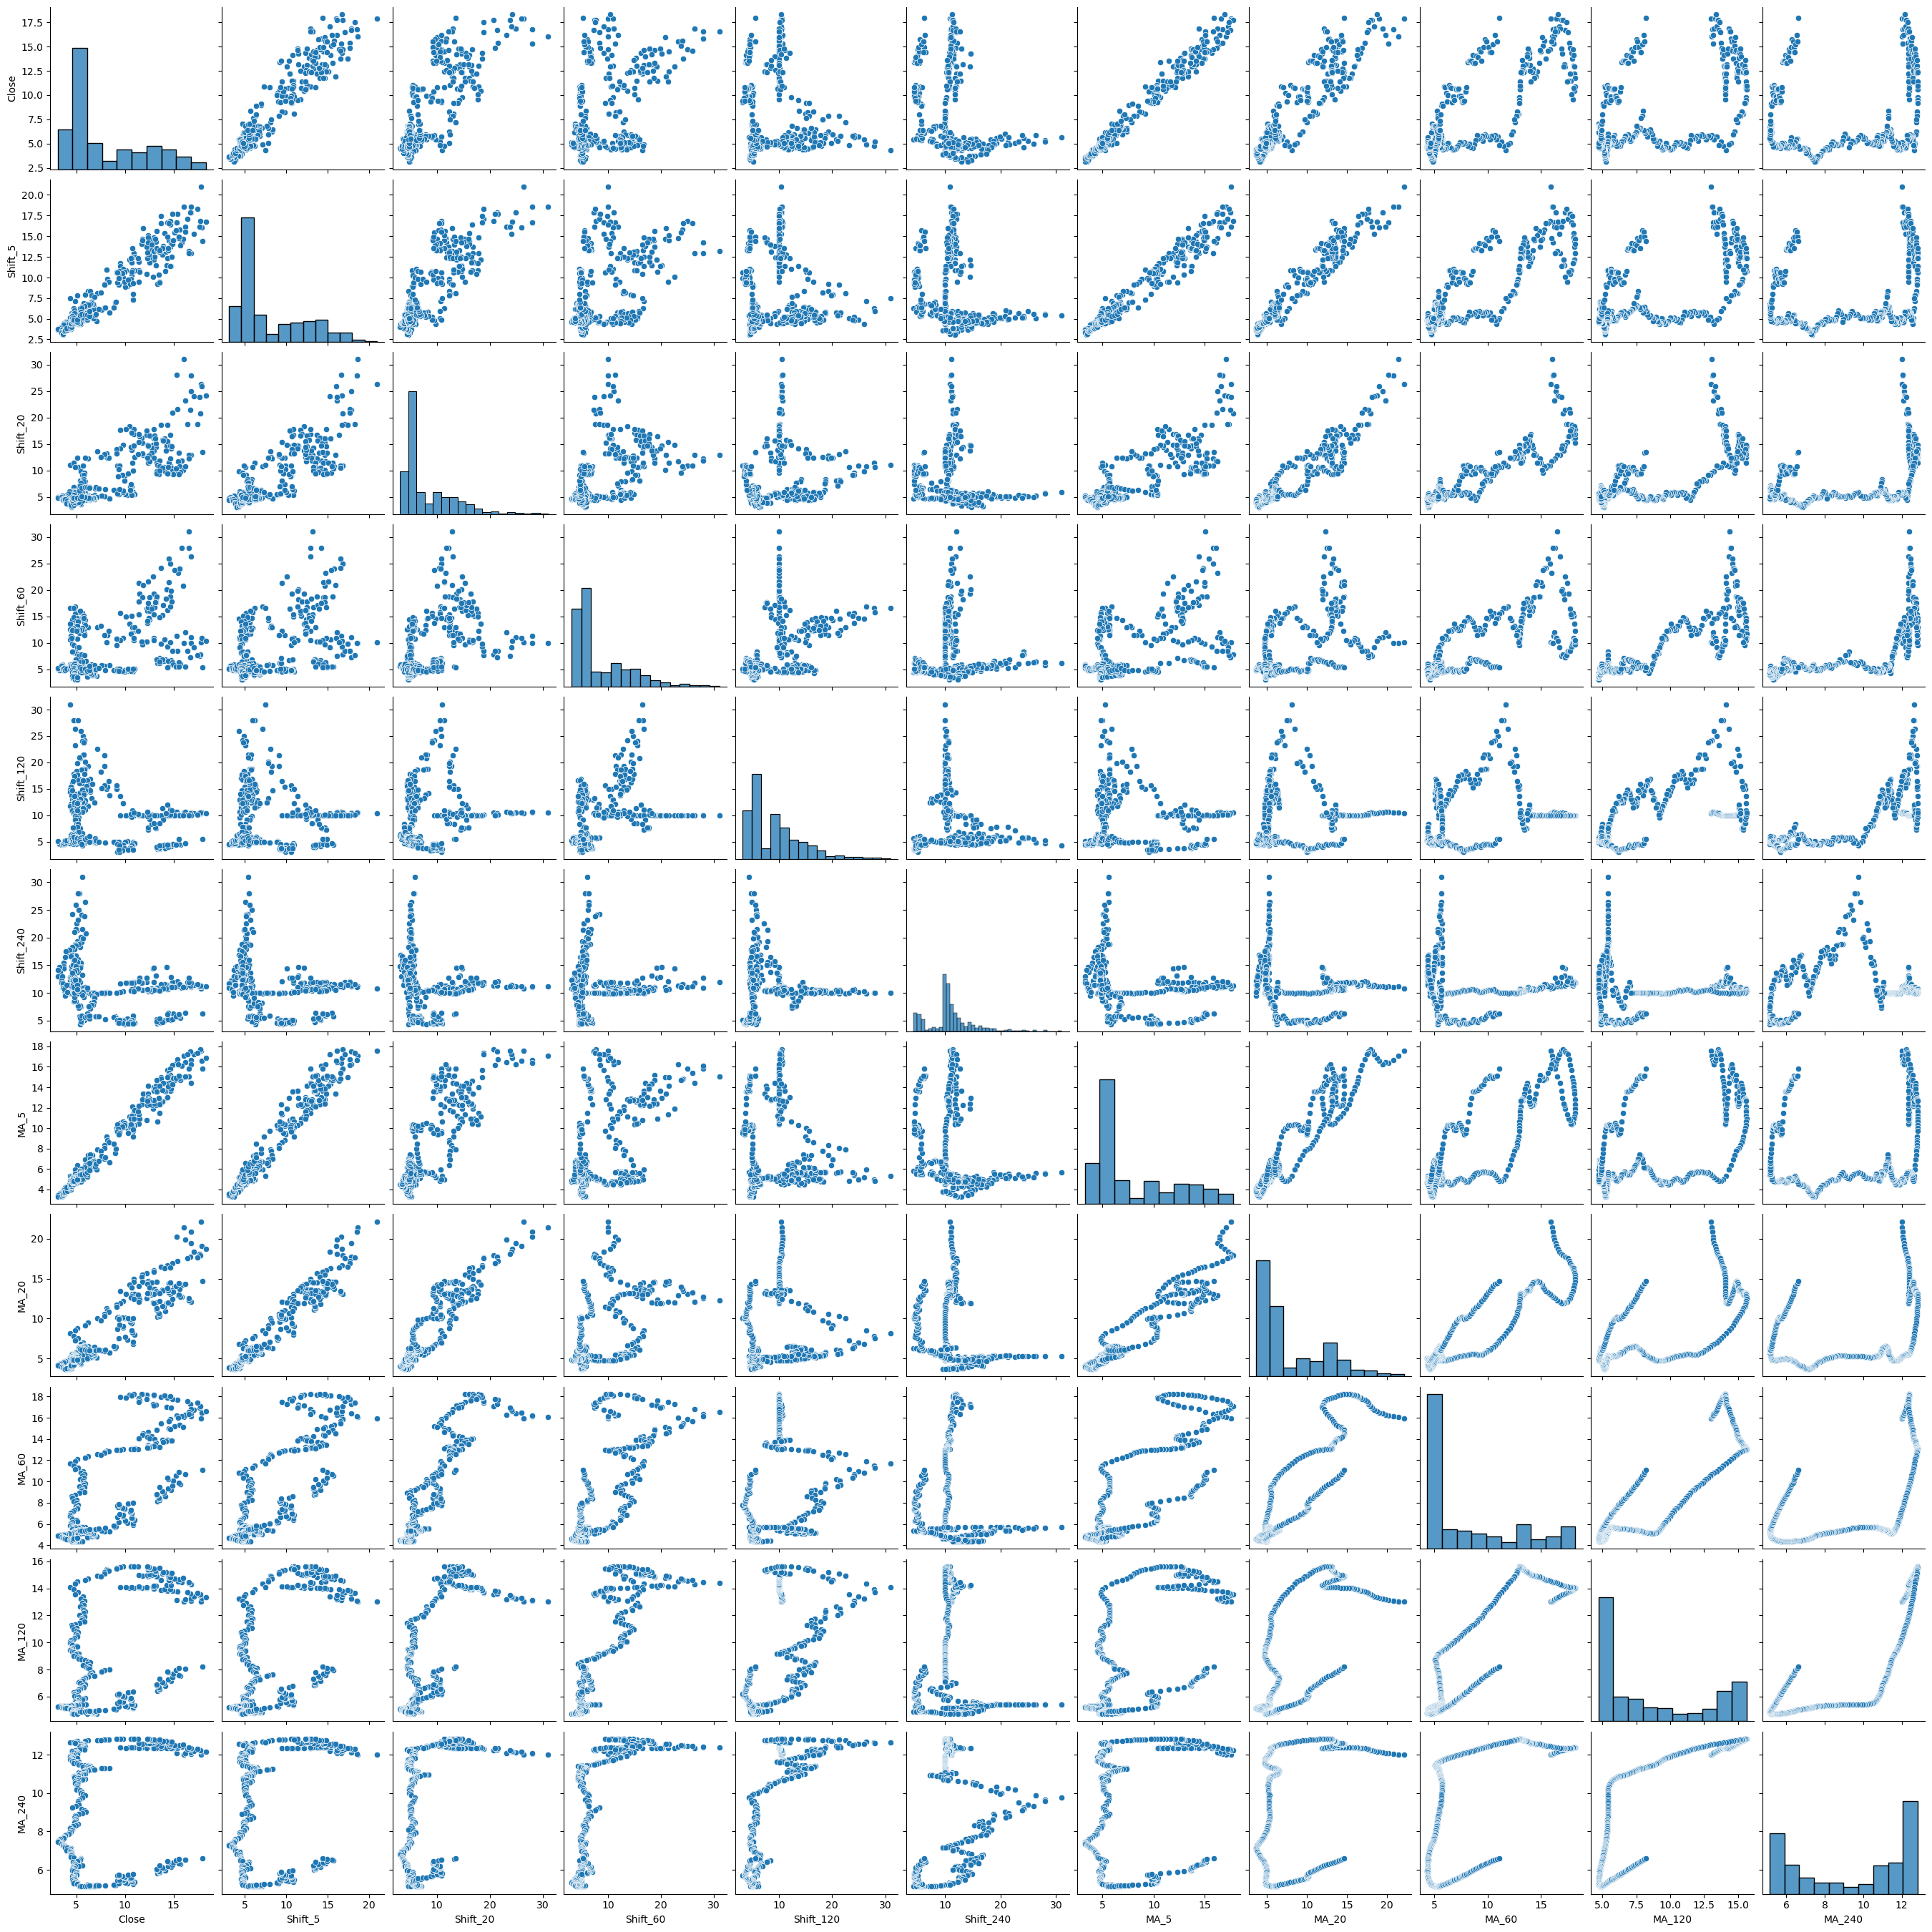

In [7]:
sns.pairplot(close)

In [8]:
X = close.drop(columns=["Close"])
y = close["Close"]

print(f"X: {X.shape}, y: {y.shape}")

X: (406, 10), y: (406,)


In [9]:
split = int(np.round(len(X) * 0.75, 0))

X_train, X_test = X.iloc[:split].values, X.iloc[split:].values
y_train, y_test = y.iloc[:split].values, y.iloc[split:].values

In [14]:
# https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

model = make_pipeline(StandardScaler(), LinearRegression())
print(model)
model.fit(X_train, y_train)
print(f"Model Score: {model.score(X_train, y_train)}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Model Score: 0.9868223753338596


In [11]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.395483469678358